In [1]:
import sklearn
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
%matplotlib inline

(26, 2)

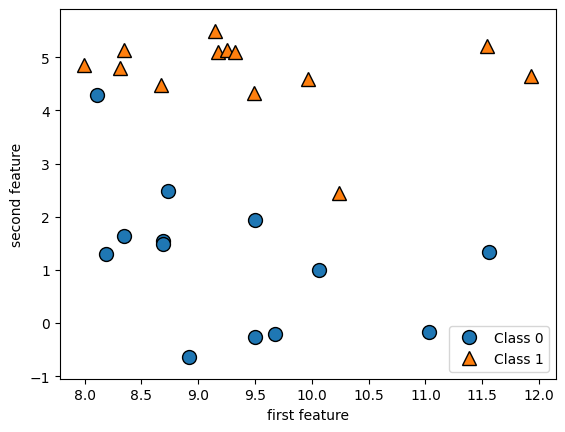

In [2]:
# 生成数据集 - 模拟二分类数据
X, y = mglearn.datasets.make_forge()

# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')
X.shape

Text(0, 0.5, 'Target')

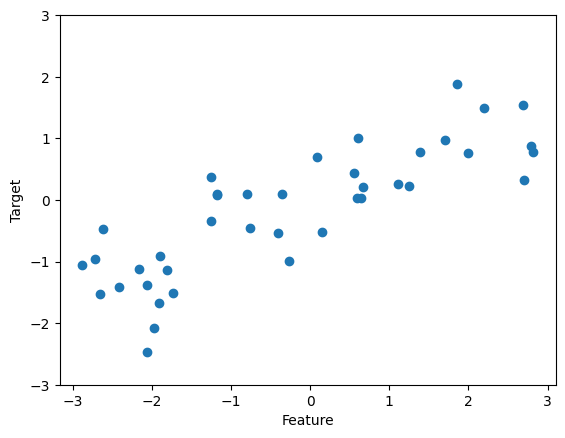

In [3]:
# 模拟回归数据 - 回归问题
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

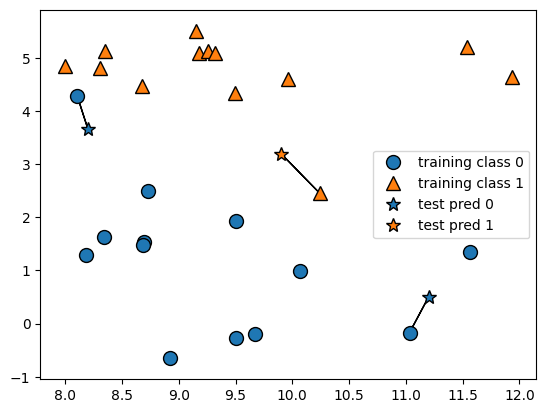

In [4]:
# 最简单的KNN
mglearn.plots.plot_knn_classification(n_neighbors=1)

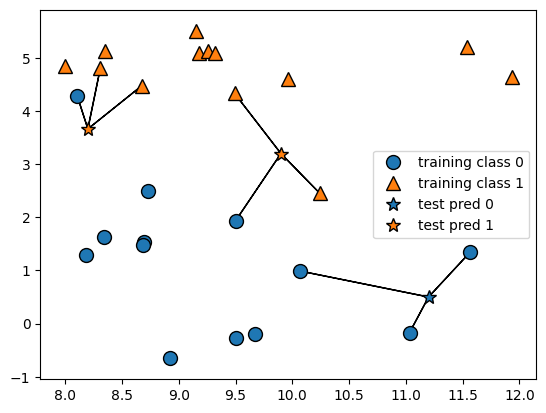

In [5]:
# 3个近邻
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
# sklearn knn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# 导入KNN类并实例化
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

# 利用训练集数据进行拟合
clf.fit(X_train, y_train)

# 调用predict方法对测试集进行预测
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [8]:
# 效果评估
clf.score(X_test, y_test)

0.8571428571428571

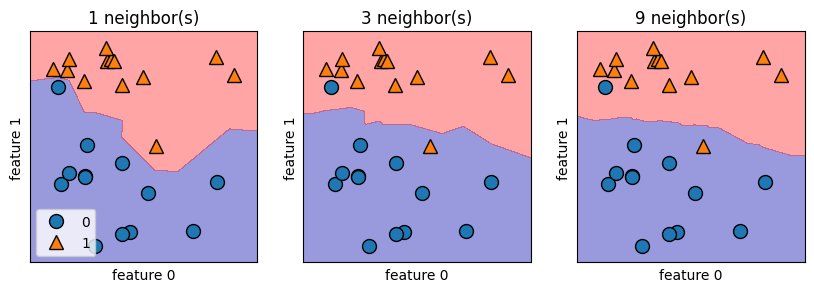

In [9]:
# 模型可视化
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=3)

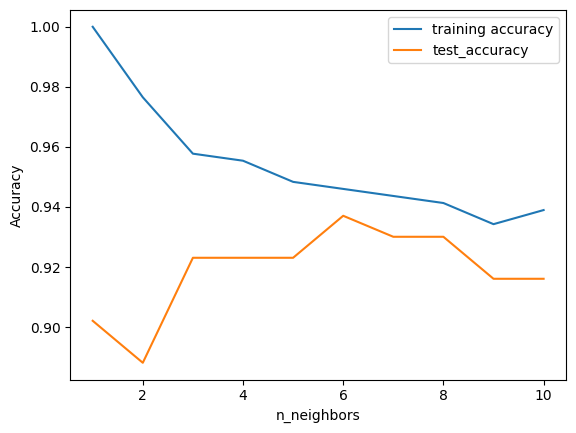

In [12]:
# 基于乳腺癌数据验证模型复杂度和泛化能力的关系
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# n_neighbors取值从1到10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # 构建模型
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # 记录精度
    training_accuracy.append(clf.score(X_train, y_train))

    # 记录泛化精度
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

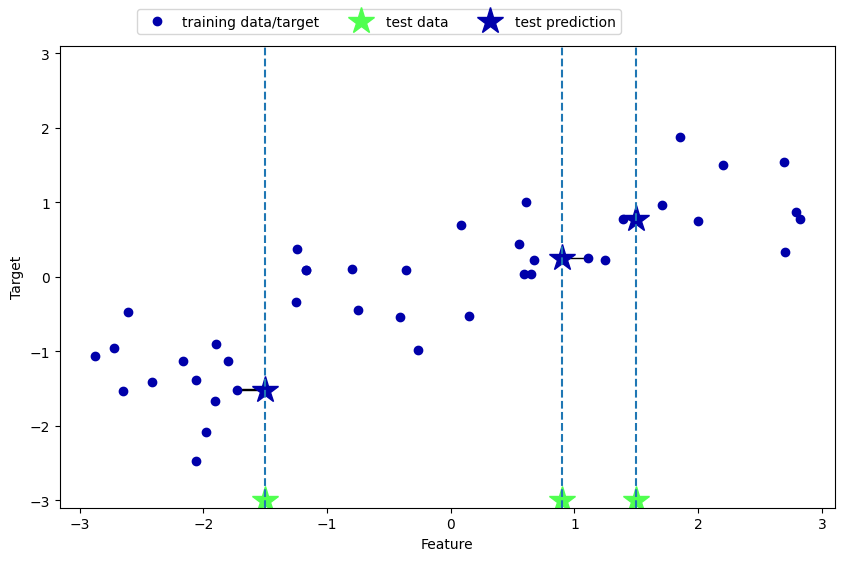

In [13]:
# k近邻回归
mglearn.plots.plot_knn_regression(n_neighbors=1)

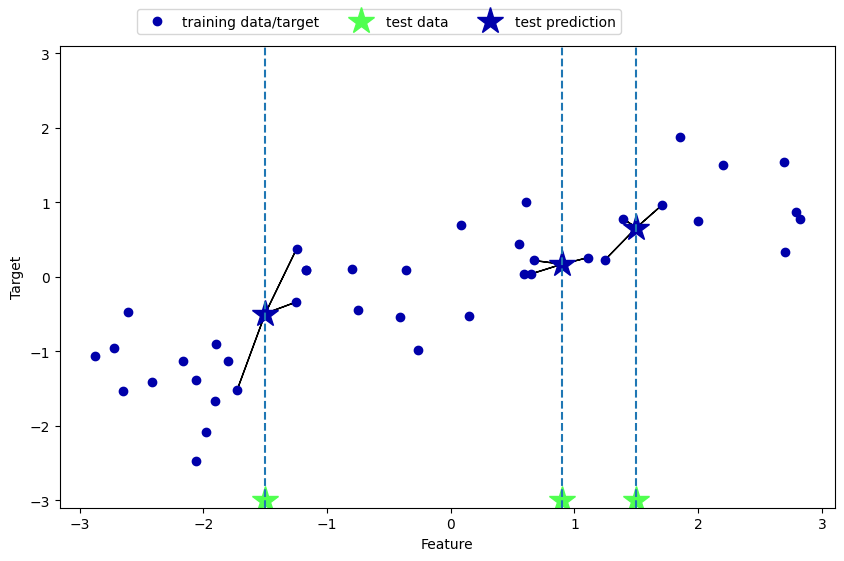

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
# sklearn实现
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave()

# 将wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
# 利用训练数据和训练目标值来拟合模型
reg.fit(X_train, y_train)

# 对测试集进行预测
reg.predict(X_test)

array([-0.79266538,  0.42776943,  0.42776943,  1.11237602,  0.42776943,
        0.89609343,  0.00297044,  1.33380525,  0.66577669, -0.34456666,
        1.65825902,  0.46201371, -0.59416201, -0.79266538,  1.7619226 ,
        0.66577669, -0.35075036, -0.53657219,  0.52456939,  0.66577669,
        1.11237602,  1.33380525,  0.66577669, -0.79266538,  0.19927087])

In [16]:
# 模型评估 R^2
reg.score(X_test, y_test)

0.6706208209942042

w[0]: 0.393906  b: -0.031804


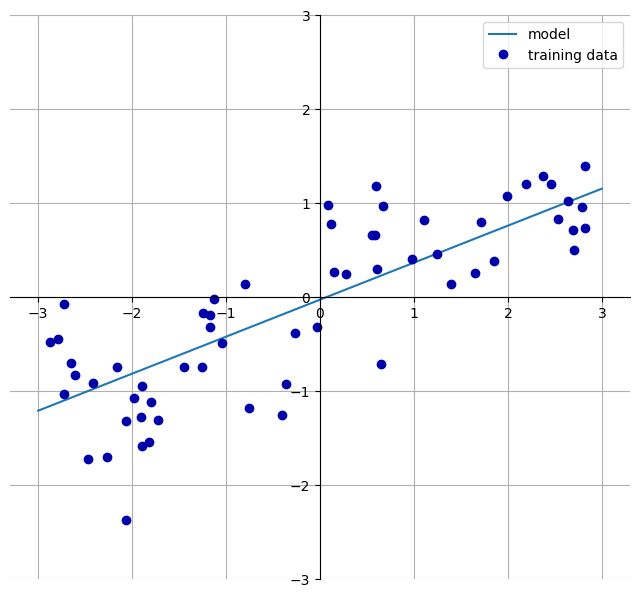

In [17]:
# 一维wave数据集上的线性模型
mglearn.plots.plot_linear_regression_wave()